In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

Text(0, 0.5, 'Gain (dB)')

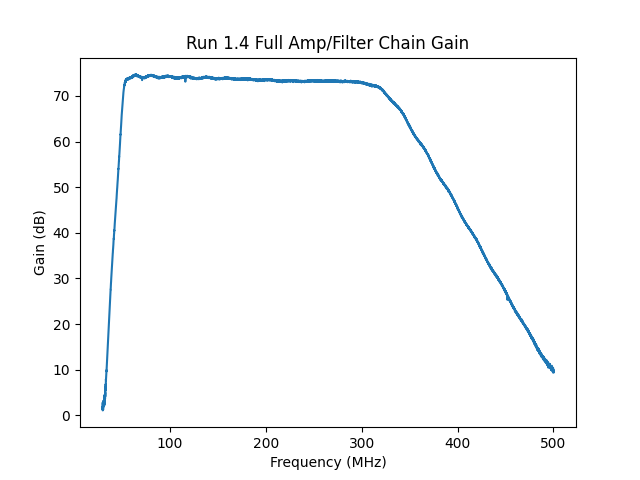

In [4]:
#see lab book p18 for details
freqs       = np.load('./data/calibration_5_8_23.npy')[:,0]
calibration = np.load('./data/calibration_5_8_23.npy')[:,1]

filename    = '1012E_amp11p16V_psu_12p93V_zklA_rfPreOff_5_8_23.npy'

data        = np.load('./data/' + filename)[:,1]
dataCal     = data - calibration

plt.close('all')
plt.figure()
plt.plot(freqs/1e6, dataCal)
plt.title('Run 1.4 Full Amp/Filter Chain Gain')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Gain (dB)')


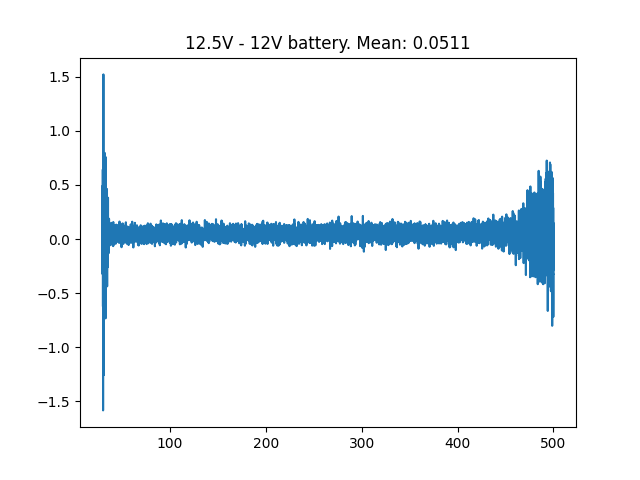

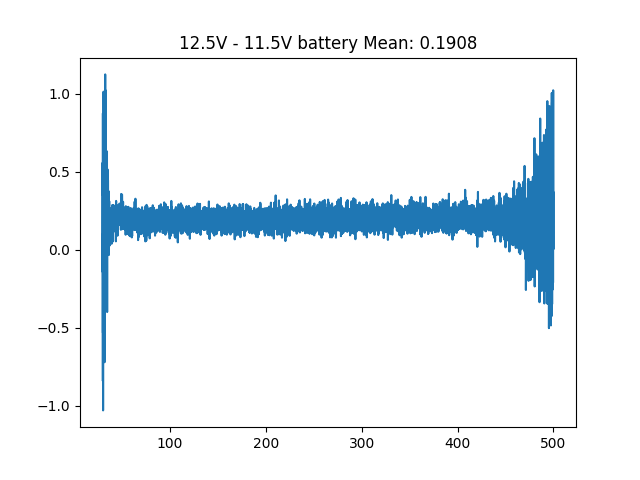

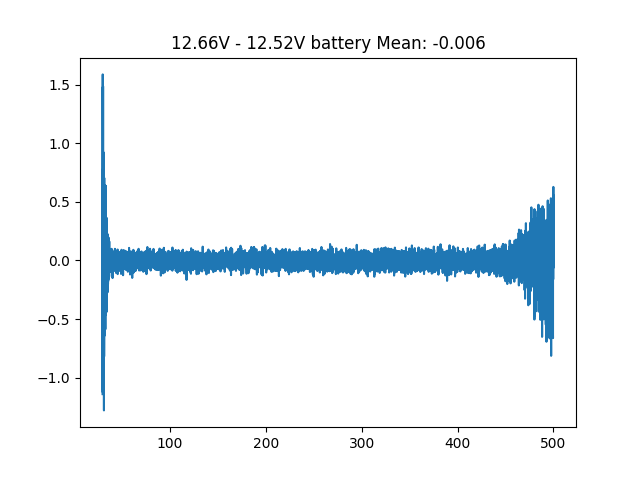

In [30]:
%matplotlib widget
plt.close('all')

filename    = '1012E_amp9p46V_psu_11p48V_zklA_rfPreOff_5_8_23.npy'
batt11p48V  = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp9p78V_psu_11p95V_zklA_rfPreOff_5_8_23.npy'
batt11p95V  = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp10p25V_psu_12p52V_zklA_rfPreOff_5_8_23.npy'
batt12p52V   = np.load('./data/' + filename)[:,1]

filename    = '1012E_amp10p42V_psu_12p66V_zklA_rfPreOff_5_8_23.npy'
batt12p66V   = np.load('./data/' + filename)[:,1]

plt.figure()
plt.title(f'12.5V - 12V battery. Mean: {round(np.mean((batt12p52V - batt11p95V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p52V - batt11p95V )


plt.figure()
plt.title(f'12.5V - 11.5V battery Mean: {round(np.mean((batt12p52V - batt11p48V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p52V - batt11p48V )


plt.figure()
plt.title(f'12.66V - 12.52V battery Mean: {round(np.mean((batt12p66V - batt12p52V)[600:5500]),4)}')
plt.plot(freqs/1e6, batt12p66V - batt12p52V )



Text(0, 0.5, 'Average Gain, with Track Gen (dBm)')

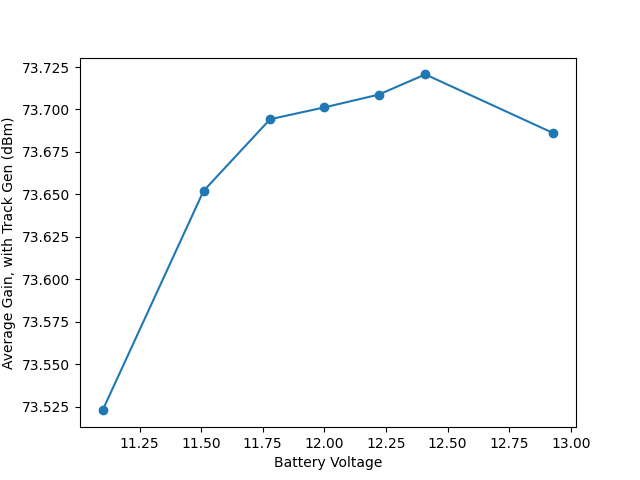

In [53]:
#after modifying the driver board to increase amp voltage by about half a volt

psu11p10V   = np.load('./data/' + '1012E_amp9p50V_psu_11p10V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu11p51V   = np.load('./data/' + '1012E_amp9p83V_psu_11p51V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu11p78V   = np.load('./data/' + '1012E_amp10p06V_psu_11p78V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p00V   = np.load('./data/' + '1012E_amp10p27V_psu_12p00V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p22V   = np.load('./data/' + '1012E_amp10p49V_psu_12p22V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p41V   = np.load('./data/' + '1012E_amp10p67V_psu_12p41V_zklA_rfPreOff_5_8_23.npy')[:,1]
psu12p93V   = np.load('./data/' + '1012E_amp11p16V_psu_12p93V_zklA_rfPreOff_5_8_23.npy')[:,1]


dataList    = [psu11p10V,
    psu11p51V,
    psu11p78V,
    psu12p00V,
    psu12p22V,
    psu12p41V,
    psu12p93V]
vList       = [11.10,
    11.51,
    11.78,
    12.00,
    12.22,
    12.41,
    12.93]

vAmpList    = [9.5,
    9.83,
    10.06,
    10.27,
    10.49,
    10.67,
    11.16]

meanList    = []
for v, arr in zip(vList, dataList):
    meanList.append(np.mean((arr-calibration)[600:5500]))

plt.close('all')
plt.figure()
plt.plot(vList, meanList)
plt.scatter(vList, meanList)
plt.xlabel('Battery Voltage')
plt.ylabel('Average Gain, with Track Gen (dBm)')

Text(0, 0.5, 'PSU Voltage')

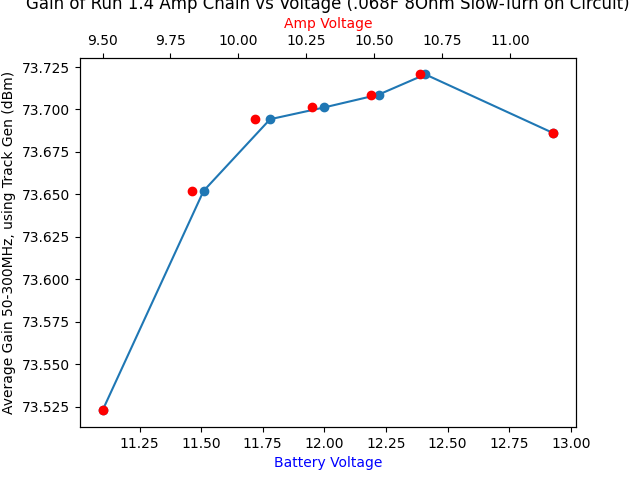

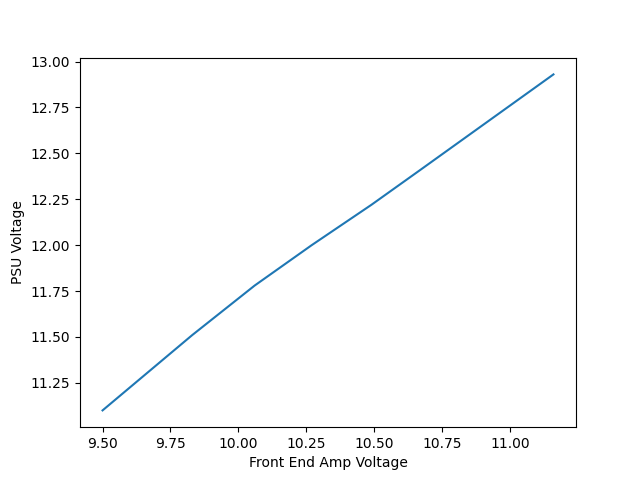

In [89]:
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
#fig.tight_layout()
plt.title('Gain of Run 1.4 Amp Chain vs Voltage (.068F 8Ohm Slow-Turn on Circuit)')

ax1.plot(vList, meanList)
ax1.scatter(vList, meanList)
ax1.set_xlabel('Battery Voltage', color = 'blue')
#ax1.set_xlim(11.,13)

ax2.scatter(vAmpList, meanList, color = 'r')
ax2.set_xlabel('Amp Voltage', color = 'red')


ax1.set_ylabel('Average Gain 50-300MHz, using Track Gen (dBm)')

plt.figure()
plt.plot(vAmpList,vList)
plt.xlabel('Front End Amp Voltage')
plt.ylabel('PSU Voltage')
